In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## A simple example

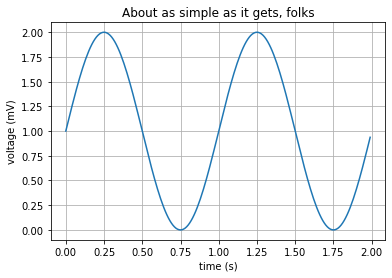

In [2]:
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

plt.show()

## Exploring a Gapminder dataset

### 1) Read CSV data

In [3]:
import csv


country = []
continent = []
year = []
life_exp = []

countries_to_filter = ["Iran", "Vietnam", "Egypt", "Namibia",
                      "Ireland", "Hungary", "Canada", "Argentina"]

with open('data/gapminder.csv', 'r') as csvfile:
    plots= csv.DictReader(csvfile, delimiter=',')
    for row in plots:
        if row["country"] in countries_to_filter:
            country.append(row["country"])
            continent.append(row["continent"])
            year.append(row["year"])
            life_exp.append(row["lifeExp"])
            
life_exp = [float(l) for l in life_exp]

### 2) Reshape data

In [4]:
data = {}
all_years = [str(i) for i in range(1952, 2008)]

for c in countries_to_filter:
    indices = [i for i, x in enumerate(country) if x == c]
    years = year[indices[0]:indices[-1]+1]
    life_exps = [life_exp[indices[years.index(yr)]] if yr in years else np.nan for yr in all_years]
    data[c] = {"year": all_years, "life_exp": life_exps}

### 3) Plot

In [5]:
plt.style.use("seaborn-talk")

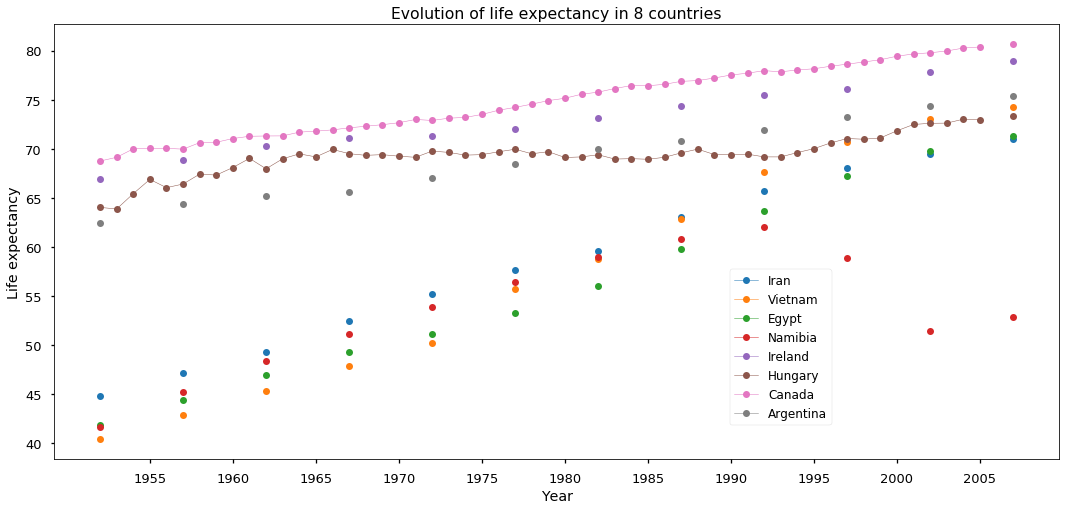

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(18,8)


for country_name, country_data in data.items():
    ax.plot("year", "life_exp", data=country_data, 
            label=country_name, marker='o', linewidth=.5, 
            markersize=7)

plt.xticks([str(i) for i in range(1955, 2010, 5)])

ax.legend(loc='best', bbox_to_anchor=(0.3, 0.065, 0.48, 0.45), fontsize='large')

ax.set(xlabel='Year', ylabel='Life expectancy',
       title='Evolution of life expectancy in 8 countries')


plt.savefig('plots/mpl-lineplot.png')
#plt.show()